In [1]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib. pyplot as plt
import numpy as np
import random
import math
%matplotlib inline

Defino una función para calcular la distancia entre 2 dountos.

In [2]:
def dis(x,y,z):
    return pow(pow(x,2)+pow(y,2)+pow(z,2),0.5) #teorema de pitagoras

Definimos una función para construir una caja de 2 dimenciones de tamaño definido con una distribución de puntos aleatorios (RR)

In [75]:
def caja_RR(dim,num_ale): 
    RR = open('Tabla_Aleatorios.dat',"w") #abrimos un scrip para manejar los datos.
    for i in range(num_ale):
        a, b = 0, 0 #iniciamos las variables
        a = random.random()*dim #random.random sólo da valores entre 0 y 1 por lo que lo multiplico por la dimención de la caja
        b = random.random()*dim
        RR.write("%f  \t%f \n" % (a,b)) #escribimos los valores en el scip.
    RR.close()
    return np.loadtxt('Tabla_Aleatorios.dat') # x = RR[:,0] | y = RR[:,1]

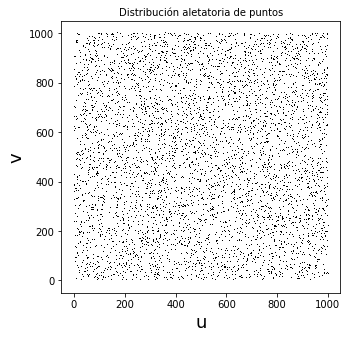

In [78]:
#Creamos caja de 1000x1000 con 5000 puntos aleatorios
RR_1 = caja_RR(1000,5000)

#Graficamos:
plt.figure(figsize=(5,5))
plt.title('Distribución aletatoria de puntos',fontsize=10)
plt.plot(RR_1[:,0],RR_1[:,1],'k,') # u = RR_1[:,0] | v = RR_1[:,1]
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.show()

## 1. Crea una caja en 2d de tamaño 1000 con las siguientes distribuciones:
a) puntos en una malla cuadriculada de distancia (10x10 cada retícula)

b) 1000 puntos sobre un disco de radio 300

c) 1000 puntos sobre un anillo con radio mayor 300 y radio menor 290

d) 50 anillos con 100 puntos cada uno cuyos centros están distribuidos aleatoriamente sobre la caja

#### a) Malla cuadriculada de 1000x1000 (10x10 cada retícula)

Definimos una función que haga una malla del tamaño que le indique el usuario en la cual hacemos 2 ciclos for, uno para acomodar los puntos en "x" cada "ret" unidades y el otro para acomodar los puntos en "y" cada "ret" unidades. 

In [104]:
def malla_cuad (tamaño,ret):
    DD = [] 
    DD = open('Tabla_Datos_malla.dat',"w")  #abrimos un scrip para manejar los datos.
    c, d = 0, 0
    for i in range(int(tamaño/ret)):
        for j in range(int(tamaño/ret)):
            c, d  = i*ret, j*ret #acomoda los puntos en y
            DD.write("%f  \t%f \n" % (c,d))
    DD.close()
    return np.loadtxt('Tabla_Datos_malla.dat') 

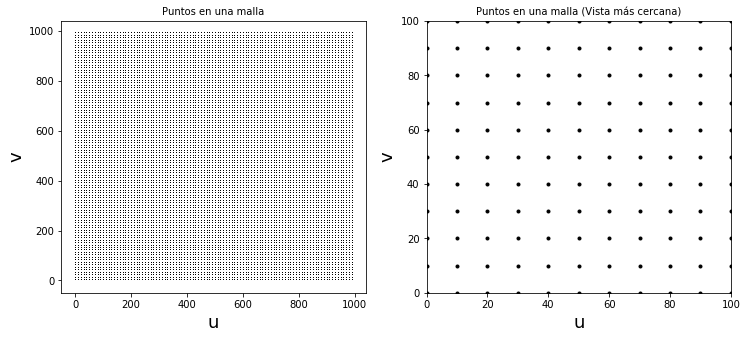

In [112]:
DDt_1 = malla_cuad(1000,10) #hacemos una malla de tamaño 1000x1000 (10x10 cada reticula)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Puntos en una malla',fontsize=10)
plt.plot(DDt_1[:,0],DDt_1[:,1],'k,')
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.subplot(1,2,2)
plt.title('Puntos en una malla (Vista más cercana)',fontsize=10)
plt.plot(DDt_1[:,0],DDt_1[:,1],'k.')
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

###### b) 1000 puntos sobre un disco de radio 300

In [114]:
def disco_random (rad,puntos):
    DD = []
    DD = open('Tabla_Datos_disco.dat',"w")  #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        r = pow(random.randrange(0,rad**2,1),0.5) #Radio aleatorio tomando en cuenta el jacobiano.
        th = random.random()*2*math.pi #valor de theta aleatorio, 
        x = r*math.cos(th) # usando la ecuación parametrica del círculo 
        y = r*math.sin(th)
        DD.write("%f  \t%f \n" % (x,y)) 
    DD.close()
    return np.loadtxt('Tabla_Datos_disco.dat')

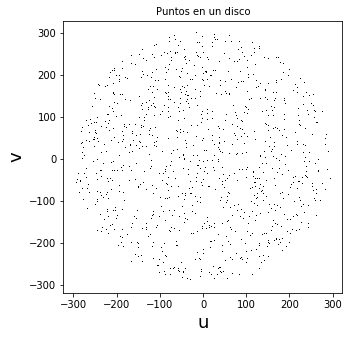

In [115]:
DDt_2 = disco_random(300,1000)

plt.figure(figsize=(5,5))
plt.title('Puntos en un disco',fontsize=10)
plt.plot(DDt_2[:,0],DDt_2[:,1],'k,')
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.show()

###### c) 1000 puntos sobre un anillo con radio mayor 300 y radio menor 290

In [117]:
def anillo_random(rad_ex,rad_in,puntos):
    DD = []
    DD = open('Tabla_Datos_Aro.dat',"w")  #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        r = pow(random.randrange(rad_in**2,rad_ex**2,1),0.5)
        th = random.random()*2*math.pi
        x = r*math.cos(th) 
        y = r*math.sin(th)
        DD.write("%f  \t%f \n" % (x,y))
    DD.close()
    return np.loadtxt('Tabla_Datos_Aro.dat') # u = RR_1[:,0] y v = RR_1[:,1]

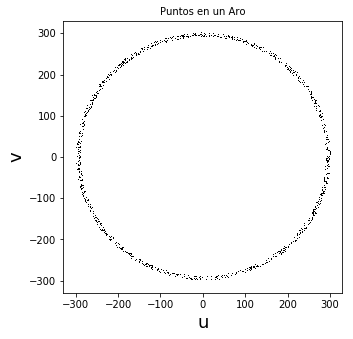

In [122]:
DDt_3 = anillo_random(300,290,1000) # Anillo de radio interno 290 y radio externo 300 con 1000 puntos

plt.figure(figsize=(5,5))
plt.title('Puntos en un Aro',fontsize=10)
plt.plot(DDt_3[:,0],DDt_3[:,1],'k,')
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.show()

###### d) 50 anillos con 100 puntos cada uno cuyos centros están distribuidos aleatoriamente sobre la caja

In [125]:
def anillos_randoms(num_anillos, radio, puntos, tam_caja):
    DD = [] 
    DD_u = []
    DD_v = []
    for i in range(num_anillos):
        ac = []
        DD = open('Tabla_Datos_anillos_aleatorios.dat',"w")  #abrimos un scrip para manejar los datos.
        r_x0 = random.randrange(0,tam_caja,1)
        r_y0 = random.randrange(0,tam_caja,1)
        for j in range(puntos):
            r = radio
            th = (j/puntos)*2*math.pi
            x = r*math.cos(th) + r_x0
            y = r*math.sin(th) + r_y0
            if 0<x<tam_caja and 0<y<tam_caja:
                DD.write("%f  \t%f \n" % (x,y))
        DD.close()
        ac = np.loadtxt('Tabla_Datos_anillos_aleatorios.dat')
        DD_u.append(ac[:,0])
        DD_v.append(ac[:,1])
    return [DD_u,DD_v]

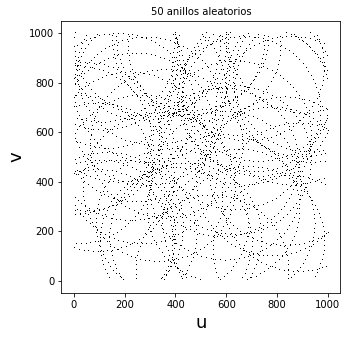

In [127]:
DDt_4_u,DDt_4_v = anillos_randoms(50,300,100,1000)
plt.figure(figsize=(5,5))
plt.title('50 anillos aleatorios',fontsize=10)
for i in range(50):
    plt.plot(DDt_4_u[i],DDt_4_v[i],'k,')
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.show()

In [63]:
# d) 50 anillos con 100 puntos aleatorios cada uno cuyos centros están distribuidos aleatoriamente sobre la caja

DDt_5_u = []
DDt_5_v = []
ac = [] 
for i in range(50):
    DD_5 = open('Tabla_Datos_anillos_aleatorios2.dat',"w")  #abrimos un scrip para manejar los datos.
    r_x0 = random.randrange(0,1000,1)
    r_y0 = random.randrange(0,1000,1)
    for j in range(100):
        r = pow(random.randrange(84100,90000,1),0.5)
        th = random.random()*2*math.pi
        x = r*math.cos(th) + r_x0
        y = r*math.sin(th) + r_y0
        if 0<x<1000 and 0<y<1000:
            DD_5.write("%f  \t%f \n" % (x,y))
    DD_5.close()
    ac = np.loadtxt('Tabla_Datos_anillos_aleatorios2.dat')
    DDt_5_u.append(ac[:,0])
    DDt_5_v.append(ac[:,1])
    ac = []

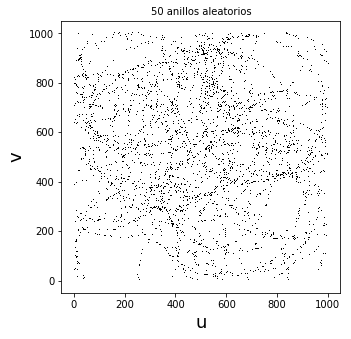

In [64]:
plt.figure(figsize=(5,5))
plt.title('50 anillos aleatorios',fontsize=10)
for i in range(50):
    plt.plot(DDt_5_u[i],DDt_5_v[i],'k,')
plt.xlabel('u',fontsize=18)
plt.ylabel('v',fontsize=18)
plt.show()

## 2. Haz un algoritmo que calcule la función de correlación con DD/RR-1 con el mismo número de puntos aleatorios que datos, y comprueba que si usas muestras aleatorias la función de correlación es cero. Cambia el número de puntos y el tamaño de bin, y observa qué ocurre.